In [4]:
!pip install pandas-datareader

import pandas as pd
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2010,1,1)
end = dt.datetime.now()

tickers = ['AAPL', 'MSFT', 'GOOG', 'F', 'MS']

df = pd.DataFrame()
for ticker in tickers:
    df2 = web.DataReader(ticker, 'yahoo', start, end)
    df[ticker] = df2['Adj Close']

In [6]:
df.head()

,AAPL,MSFT,GOOG,F,MS
Date,,,,,
2009-12-31,6.444381,23.541971,308.832428,6.710280,23.820152
2010-01-04,6.544687,23.904985,312.204773,6.898167,24.874359
2010-01-05,6.556002,23.912706,310.829926,7.354465,25.783709
2010-01-06,6.451721,23.765953,302.994293,7.629587,26.113649
2010-01-07,6.439793,23.518795,295.940735,7.824187,26.491871


In [7]:
df.tail()

,AAPL,MSFT,GOOG,F,MS
Date,,,,,
2022-02-07,171.660004,300.950012,2778.760010,17.889999,105.180000
2022-02-08,174.830002,304.559998,2784.260010,17.719999,106.349998
2022-02-09,176.279999,311.209991,2829.060059,18.350000,108.730003
2022-02-10,172.119995,302.380005,2772.050049,18.080000,107.570000
2022-02-11,168.639999,295.040009,2682.600098,17.549999,104.570000


In [9]:
import numpy as np

return1 = np.log(df/df.shift(1))

In [10]:
return1.head()

,AAPL,MSFT,GOOG,F,MS
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015445,0.015302,0.010860,0.027615,0.043306
2010-01-05,0.001727,0.000323,-0.004413,0.064052,0.035905
2010-01-06,-0.016034,-0.006156,-0.025532,0.036726,0.012715
2010-01-07,-0.001851,-0.010454,-0.023555,0.025186,0.014380


In [11]:
return1.tail()

,AAPL,MSFT,GOOG,F,MS
Date,,,,,
2022-02-07,-0.004244,-0.016445,-0.028929,-0.003905,0.010225
2022-02-08,0.018298,0.011924,0.001977,-0.009548,0.011062
2022-02-09,0.008260,0.021600,0.015962,0.034936,0.022132
2022-02-10,-0.023882,-0.028783,-0.020357,-0.014823,-0.010726
2022-02-11,-0.020426,-0.024574,-0.032801,-0.029752,-0.028285


In [13]:
return1.dropna(inplace=True)
return1.head()

,AAPL,MSFT,GOOG,F,MS
Date,,,,,
2010-01-04,0.015445,0.015302,0.010860,0.027615,0.043306
2010-01-05,0.001727,0.000323,-0.004413,0.064052,0.035905
2010-01-06,-0.016034,-0.006156,-0.025532,0.036726,0.012715
2010-01-07,-0.001851,-0.010454,-0.023555,0.025186,0.014380
2010-01-08,0.006626,0.006873,0.013243,0.002569,-0.020562


In [14]:
return1.describe()

,AAPL,MSFT,GOOG,F,MS
count,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000
mean,0.001070,0.000829,0.000709,0.000315,0.000485
std,0.017699,0.015838,0.016298,0.020634,0.022146
min,-0.137708,-0.159453,-0.117667,-0.144002,-0.169603
25%,-0.007154,-0.006702,-0.006470,-0.009534,-0.009950
50%,0.000951,0.000694,0.000699,0.000000,0.000592
75%,0.010420,0.008789,0.008787,0.010158,0.011721
max,0.113157,0.132929,0.148872,0.210596,0.180403


In [22]:
Er = np.array(return1.describe().loc['mean'])
std = np.array(return1.describe().loc['std'])
var = std**2

In [21]:
varcovar1 = return1.cov()
varcovar1

,AAPL,MSFT,GOOG,F,MS
AAPL,0.000313,0.000159,0.000154,0.000129,0.000159
MSFT,0.000159,0.000251,0.000161,0.000122,0.000168
GOOG,0.000154,0.000161,0.000266,0.000121,0.000166
F,0.000129,0.000122,0.000121,0.000426,0.000258
MS,0.000159,0.000168,0.000166,0.000258,0.000490


In [35]:
# Efficient portfolio A

c1 = 0

weightA = np.linalg.inv(varcovar1) @ (Er-c1) / np.sum(np.linalg.inv(varcovar1) @ (Er-c1))
ErA = weightA @ Er
ErA
VarA = weightA @ varcovar1 @ weightA.T
VarA
stdA = np.sqrt(VarA)

In [24]:
weightA

array([ 0.65155698,  0.44022073,  0.12542825, -0.1167766 , -0.10042936])

In [36]:
# Efficient portfolio B

c2 = 0.04

weightB = np.linalg.inv(varcovar1) @ (Er-c2) / np.sum(np.linalg.inv(varcovar1) @ (Er-c2))
ErB = weightB @ Er
ErB
VarB = weightB @ varcovar1 @ weightB.T
VarB
stdB = np.sqrt(VarB)

In [26]:
weightB

array([ 0.1879895 ,  0.32026199,  0.29208655,  0.20195931, -0.00229736])

In [31]:
covAB = weightA @ varcovar1 @ weightB.T

In [60]:
wa = np.linspace(-1.5, 4.5, num = 10)
wb = 1- wa

In [61]:
ErC = wa*ErA + wb*ErB
ErC

array([0.00024212, 0.00046174, 0.00068136, 0.00090098, 0.0011206 ,
       0.00134022, 0.00155984, 0.00177946, 0.00199908, 0.0022187 ])

In [62]:
stdC = np.sqrt((wa*stdA)**2 + (wb*stdB)**2 + 2*wa*wb*covAB)
stdC

array([0.01928368, 0.0155494 , 0.01359679, 0.01418194, 0.01704545,
       0.02128692, 0.0262466 , 0.03158799, 0.03714678, 0.04283843])

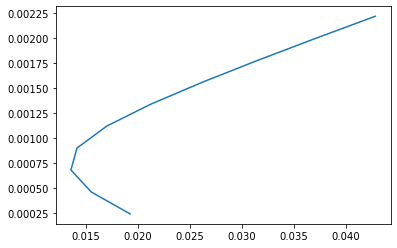

In [63]:
import matplotlib.pyplot as plt

plt.plot(stdC, ErC)
plt.show()

In [64]:
# Global Minimum Variance Portfolio

UM = np.ones((varcovar1.shape[0]))

GMVP = UM @ np.linalg.inv(varcovar1) / (UM @ np.linalg.inv(varcovar1) @ UM.T)

In [65]:
GMVP
ErG = GMVP @ Er
stdG = np.sqrt(GMVP @ varcovar1 @ GMVP.T)
stdG

0.013492545454902184

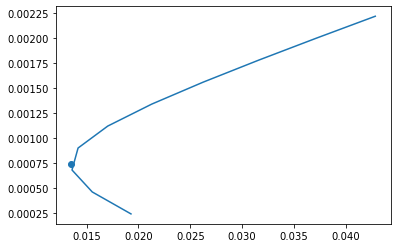

In [66]:
plt.plot(stdC, ErC)
plt.scatter(stdG, ErG)
plt.show()